In [1]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tqdm.auto import tqdm

#### Multilayer Perceptron implementation. 

#### ¡ Here we go !

#### Classic data download and check:

In [2]:
diamonds_df = pd.read_csv('diamonds.csv')

In [3]:
diamonds_df = diamonds_df.drop(columns=['Unnamed: 0'])
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


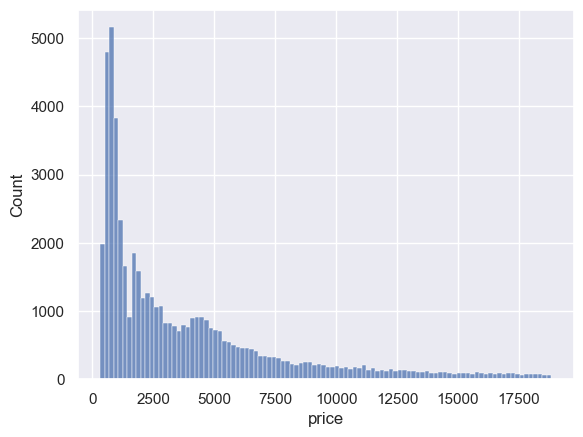

In [4]:
sns.histplot(diamonds_df['price'], bins=100)
plt.show()

#### Data Preprocessing:

In [5]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [6]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [7]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [8]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [9]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

#### Let's start training with scikit-learn based models:

In [11]:
reg = LinearRegression().fit(X_train, y_train)

In [12]:
loss = mean_squared_error(y_train, reg.predict(X_train))
print(f'MSE Loss: {loss}')

MSE Loss: 1481760.4738284694


In [13]:
y_pred = reg.predict(X_test)
score = r2_score(y_pred, y_test)

In [14]:
print(score)

0.8977468673125782


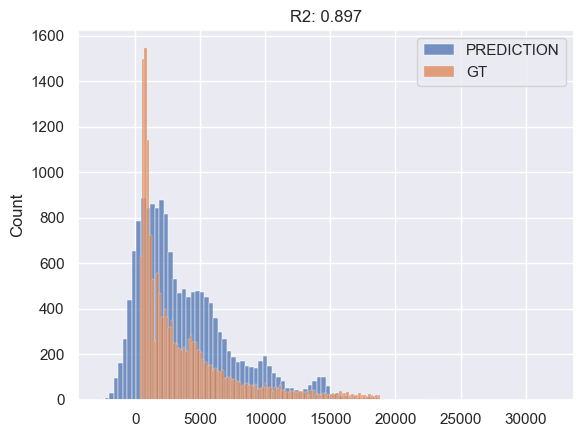

In [15]:
plt.title(f'R2: {str(score)[:5]}')
sns.histplot(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
sns.histplot(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.show()

#### Now let's build our own Small & Lightweight Neural Network:

In [88]:
class MLPRegressor:
    def __init__(
        self,
        hidden_layer_sizes=(100,),
        learning_rate=0.001,
        max_iter=10,
        num_layers = 2,
        input_size = 9
    ):        
        '''
        MLPRegressor model's constructor.

        Parameters:

        hidden_layers_sizes - size of hidden layers;
        learning_rate - factor for gradient step;
        max_iter - iterations for training;
        num_layers - number of layers in architecture;
        input_size - number of input vector dimensions (9 in current task).

        '''

        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.num_layers = num_layers
        self.input_size = (input_size,)
        self.output_size = (1,) # In case of regression

        self.weights, self.bias = self.create_weights()

    @staticmethod
    def sigmoid_function_calc(x):
        
        '''Returns the evaluated sigmoid function'''
        
        return 1 / (1 + np.exp(-x))
    
    # @staticmethod
    def sigmoid_function_derivative(self, x):
        
        '''Returns the derivative of sigmoid function due to math formula of derivative'''
        
        sigmoid = self.sigmoid_function_calc(x)
        return sigmoid * (1 - sigmoid)
    
    @staticmethod
    def linear_function(x):
        
        '''Classic linear function in shape of f(x) = x'''
        
        return x
    
    @staticmethod
    def linear_function_derivative(x):
        
        '''Derivative of linear function as ones which would be multiplied by weights matrix'''

        return np.ones_like(x)
    
    @staticmethod
    def mse_loss_func(output, y):
        
        '''Loss function of regression model: Mean Squared Error'''

        return np.mean(np.square(y - output))
    
    @staticmethod
    def mse_loss_function_derivative(output, y):
        
        '''Loss function derivative due to math formula'''

        return ((-2) * (y - output)) / (y.size)
    
    def create_weights(self):
        
        '''
        Creates weights for architecture blocks (bias included).
        Supports any number of layers (self.num_layers), but
        doesn't any number of vector's dimensions.
        '''
        
        weights = []
        bias_weights = []

        for layer in range(self.num_layers + 2):
            
            if layer == 0: # process the first input (not hidden)
                
                 # let it be standard normal distribution, why not
                weights_generated = np.random.randn(self.input_size[0], self.hidden_layer_sizes[0]) 
                bias_generated = np.zeros((1, self.hidden_layer_sizes[0]))

                weights.append(weights_generated)
                bias_weights.append(bias_generated)

            elif layer <= self.num_layers: # process hidden weights
                 
                 weights_generated = np.random.randn(self.hidden_layer_sizes[0], self.hidden_layer_sizes[0]) 
                 bias_generated = np.zeros((1, self.hidden_layer_sizes[0]))

                 weights.append(weights_generated)
                 bias_weights.append(bias_generated)

            else: # process last (output)
                
                 weights_generated = np.random.randn(self.hidden_layer_sizes[0], self.output_size[0]) 
                 bias_generated = np.zeros((1, self.output_size[0]))
                 weights.append(weights_generated)
                 bias_weights.append(bias_generated)
        
        return weights, bias_weights
    
    def forward_pass(self, input_data):
        
        '''Evaluates forward input_data processing and returns all history of pass'''

        activations = [input_data]
        pre_activated_data = []

        for i in range(len(self.weights) - 1):
            
            pre_activated = np.dot(activations[-1], self.weights[i]) + self.bias[i]

            activations_apply = self.sigmoid_function_calc(pre_activated)

            activations.append(activations_apply)
            pre_activated_data.append(pre_activated)

        # output layer:

        pre_activated_output = np.dot(activations[-1], self.weights[-1]) + self.bias[-1]
        output = self.linear_function(pre_activated_output)

        pre_activated_data.append(pre_activated_output)
        activations.append(output)

        return pre_activated_data, activations
    
    def backward_pass(self, pre_activated_data, activations, y):
        
        '''
        Back propagation implementation and weights update step
        parameters: 
        
        pre_activated_data - vectors before sigmoid function output (for sigmoid derivative execution)
        activations - vectors after sigmoid output (multiplied by weights, used in complex function derivative and dW calculation both)
        y - ground_true labels (for MSE derivative calculation)

        '''

        deltas = []

        # output layer derivatives
        mse_output_error_derivative = self.mse_loss_function_derivative(y = y, output = activations[-1]) # Last activated output and target feature
        delta = mse_output_error_derivative * self.linear_function_derivative(x = pre_activated_data[-1]) # Derivative of complex function
        deltas.append(delta)

        # hidden layers derivatives of complex functions (step by step)
        for i in reversed(range(len(self.weights) - 1)):
            delta = np.dot(deltas[-1], self.weights[i + 1].T) * self.sigmoid_function_derivative(pre_activated_data[i])
            deltas.append(delta)
            # print(i)
        
        deltas.reverse()
    
        for i in range(len(self.weights)):
            
            # Derivatives of weights
            dW = np.dot(activations[i].T, deltas[i])
            db = np.sum(deltas[i], axis=0, keepdims=True)

            # print(activations[i].shape)
            # print(deltas[i].shape)

            # Staff messages
            # print(dW.shape)
            # print(db.shape)
            # print()
            
            self.weights[i] -= self.learning_rate * dW
            self.bias[i] -= self.learning_rate * db
            
    def train(self, X, y):
        
        '''Completes Regression model's training'''
        
        for i in tqdm(range(self.max_iter)): # Like epochs
            
            # forward pass first:
            pre_activated_data, activations = self.forward_pass(X)

            # Calc loss for additional info output
            loss = self.mse_loss_func(output = activations[-1], y = y)

            # Backward pass then:
            self.backward_pass(y = y, pre_activated_data = pre_activated_data, activations = activations)
            
            # info output
            if i % 10 == 0:
                print(f"Loss for epoch №{i+1}: {loss:.4f}")
        
        print('Training complete!')

    def predict(self, X):
        
        '''Makes regression model's prediction with input_data'''
        
        _, activations = self.forward_pass(X)
        return activations[-1]
    


In [89]:
mlp_regression = MLPRegressor(learning_rate=0.001, max_iter=200, num_layers=3, hidden_layer_sizes=(128,))

#### Check for weights shapes (Approved):

In [90]:
mlp_regression.weights[0].shape, mlp_regression.weights[1].shape, mlp_regression.weights[2].shape, mlp_regression.weights[3].shape

((9, 128), (128, 128), (128, 128), (128, 128))

#### Forward pass history check (Approved):

In [91]:
pre_activated_data, activations = mlp_regression.forward_pass(X_train)

In [92]:
pre_activated_data[0].shape, pre_activated_data[1].shape, pre_activated_data[2].shape, pre_activated_data[3].shape

((37758, 128), (37758, 128), (37758, 128), (37758, 128))

In [93]:
activations[0].shape, activations[1].shape, activations[2].shape, activations[3].shape, activations[4].shape

((37758, 9), (37758, 128), (37758, 128), (37758, 128), (37758, 128))

#### Backward pass history check (Complete):

In [94]:
x = mlp_regression.backward_pass(activations = activations,
                             pre_activated_data = pre_activated_data,
                             y = y_train)

#### Let's train model with 200 epochs:

In [95]:
mlp_regression.train(X_train, y_train)

  0%|          | 0/200 [00:00<?, ?it/s]

Loss for epoch №1: 28829646.5911
Loss for epoch №11: 16323240.3095
Loss for epoch №21: 15934023.3821
Loss for epoch №31: 15923707.3174
Loss for epoch №41: 15923433.8920
Loss for epoch №51: 15923426.6430
Loss for epoch №61: 15923426.4487
Loss for epoch №71: 15923426.4412
Loss for epoch №81: 15923426.4385
Loss for epoch №91: 15923426.4357
Loss for epoch №101: 15923426.4325
Loss for epoch №111: 15923426.4290
Loss for epoch №121: 15923426.4250
Loss for epoch №131: 15923426.4205
Loss for epoch №141: 15923426.4153
Loss for epoch №151: 15923426.4093
Loss for epoch №161: 15923426.4022
Loss for epoch №171: 15923426.3937
Loss for epoch №181: 15923426.3834
Loss for epoch №191: 15923426.3706
Training complete!


#### Then predict the results and acquire metrics:

In [44]:
regression_mlp_prediction = mlp_regression.predict(X_test)

In [45]:
score = r2_score(regression_mlp_prediction, y_test)
print(score)

-352710944569961.2


#### Tough, but weights are getting updated during training btw and loss decreases.

#### Let's update the class to support custom layers length inside hidden layers:

In [ ]:
class MLPRegressorUPD:
    def __init__(
        self,
        hidden_layer_sizes=(100, 50),
        learning_rate=0.001,
        max_iter=10,
        num_layers = 2,
        input_size = 9
    ):        
        '''
        MLPRegressor model's constructor.

        Parameters:

        hidden_layers_sizes - size of hidden layers;
        learning_rate - factor for gradient step;
        max_iter - iterations for training;
        num_layers - number of layers in architecture;
        input_size - number of input vector dimensions (9 in current task).

        '''

        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.num_layers = num_layers
        self.input_size = (input_size,)
        self.output_size = (1,) # In case of regression

        self.weights, self.bias = self.create_weights()

    @staticmethod
    def sigmoid_function_calc(x):
        
        '''Returns the evaluated sigmoid function'''
        
        return 1 / (1 + np.exp(-x))
    
    # @staticmethod
    def sigmoid_function_derivative(self, x):
        
        '''Returns the derivative of sigmoid function due to math formula of derivative'''
        
        sigmoid = self.sigmoid_function_calc(x)
        return sigmoid * (1 - sigmoid)
    
    @staticmethod
    def linear_function(x):
        
        '''Classic linear function in shape of f(x) = x'''
        
        return x
    
    @staticmethod
    def linear_function_derivative(x):
        
        '''Derivative of linear function as ones which would be multiplied by weights matrix'''

        return np.ones_like(x)
    
    @staticmethod
    def mse_loss_func(output, y):
        
        '''Loss function of regression model: Mean Squared Error'''

        return np.mean(np.square(y - output))
    
    @staticmethod
    def mse_loss_function_derivative(output, y):
        
        '''Loss function derivative due to math formula'''

        return ((-2) * (y - output)) / (y.size)
    
    def create_weights(self):
        '''
        Creates weights for architecture blocks (bias included).
        Supports any number of layers based on hidden_layer_sizes.
        '''
        weights = []
        bias_weights = []

        # List of sizes: input -> hidden layers -> output
        layer_sizes = [self.input_size[0]] + list(self.hidden_layer_sizes) + [self.output_size[0]]

        for i in range(len(layer_sizes) - 1):
            # Weights between layers
            weights_generated = np.random.randn(layer_sizes[i], layer_sizes[i + 1]) 
            bias_generated = np.zeros((1, layer_sizes[i + 1]))

            weights.append(weights_generated)
            bias_weights.append(bias_generated)
        
        return weights, bias_weights
    
    def forward_pass(self, input_data):
        
        '''Evaluates forward input_data processing and returns all history of pass'''

        activations = [input_data]
        pre_activated_data = []

        for i in range(len(self.weights) - 1):
            
            pre_activated = np.dot(activations[-1], self.weights[i]) + self.bias[i]

            activations_apply = self.sigmoid_function_calc(pre_activated)

            activations.append(activations_apply)
            pre_activated_data.append(pre_activated)

        # output layer:

        pre_activated_output = np.dot(activations[-1], self.weights[-1]) + self.bias[-1]
        output = self.linear_function(pre_activated_output)

        pre_activated_data.append(pre_activated_output)
        activations.append(output)

        return pre_activated_data, activations
    
    def backward_pass(self, pre_activated_data, activations, y):
        
        '''
        Back propagation implementation and weights update step
        parameters: 
        
        pre_activated_data - vectors before sigmoid function output (for sigmoid derivative execution)
        activations - vectors after sigmoid output (multiplied by weights, used in complex function derivative and dW calculation both)
        y - ground_true labels (for MSE derivative calculation)

        '''

        deltas = []

        # output layer derivatives
        mse_output_error_derivative = self.mse_loss_function_derivative(y = y, output = activations[-1]) # Last activated output and target feature
        delta = mse_output_error_derivative * self.linear_function_derivative(x = pre_activated_data[-1]) # Derivative of complex function
        deltas.append(delta)

        # hidden layers derivatives of complex functions (step by step)
        for i in reversed(range(len(self.weights) - 1)):
            delta = np.dot(deltas[-1], self.weights[i + 1].T) * self.sigmoid_function_derivative(pre_activated_data[i])
            deltas.append(delta)
            # print(i)
        
        deltas.reverse()
    
        for i in range(len(self.weights)):
            
            # Derivatives of weights
            dW = np.dot(activations[i].T, deltas[i])
            db = np.sum(deltas[i], axis=0, keepdims=True)

            # print(activations[i].shape)
            # print(deltas[i].shape)

            # Staff messages
            # print(dW.shape)
            # print(db.shape)
            # print()
            
            self.weights[i] -= self.learning_rate * dW
            self.bias[i] -= self.learning_rate * db
            
    def train(self, X, y):
        
        '''Completes Regression model's training'''
        
        for i in tqdm(range(self.max_iter)): # Like epochs
            
            # forward pass first:
            pre_activated_data, activations = self.forward_pass(X)

            # Calc loss for additional info output
            loss = self.mse_loss_func(output = activations[-1], y = y)

            # Backward pass then:
            self.backward_pass(y = y, pre_activated_data = pre_activated_data, activations = activations)
            
            # info output
            if i % 10 == 0:
                print(f"Loss for epoch №{i+1}: {loss:.4f}")
        
        print('Training complete!')

    def predict(self, X):
        
        '''Makes regression model's prediction with input_data'''
        
        _, activations = self.forward_pass(X)
        return activations[-1]

#### Test the shapes (Approved):

In [70]:
mlp_regression_upd = MLPRegressorUPD(learning_rate=0.001, max_iter=400, num_layers=1, hidden_layer_sizes=(128, ))

In [71]:
mlp_regression_upd.weights[0].shape, mlp_regression_upd.weights[1].shape

((9, 128), (128, 1))

#### Test the forward pass (Approved):

In [72]:
pre_activated_data, activations = mlp_regression_upd.forward_pass(X_train)

In [73]:
pre_activated_data[0].shape, pre_activated_data[1].shape

((37758, 128), (37758, 1))

In [74]:
activations[0].shape, activations[1].shape

((37758, 9), (37758, 128))

#### Backward pass test (Completed):

In [75]:
x = mlp_regression_upd.backward_pass(activations = activations,
                             pre_activated_data = pre_activated_data,
                             y = y_train)

#### Let's train it (Finally, I've tried much more epochs and losses shown below is the result of ~1200 epochs in total): 

In [85]:
mlp_regression_upd.train(X_train, y_train)

  0%|          | 0/400 [00:00<?, ?it/s]

Loss for epoch №1: 1408536.8750
Loss for epoch №11: 1385536.5884
Loss for epoch №21: 1383591.1884
Loss for epoch №31: 1418923.0890
Loss for epoch №41: 1530158.9677
Loss for epoch №51: 1938836.9686
Loss for epoch №61: 1607488.2330
Loss for epoch №71: 1357009.9317
Loss for epoch №81: 1282768.7200
Loss for epoch №91: 1283741.5506
Loss for epoch №101: 1321302.8225
Loss for epoch №111: 1299477.5936
Loss for epoch №121: 1297707.9480
Loss for epoch №131: 1425898.3641
Loss for epoch №141: 1486173.5062
Loss for epoch №151: 1433787.5177
Loss for epoch №161: 1385292.2553
Loss for epoch №171: 1320372.6643
Loss for epoch №181: 1314210.0529
Loss for epoch №191: 1272410.7779
Loss for epoch №201: 1183859.5584
Loss for epoch №211: 1152571.1786
Loss for epoch №221: 1183285.1561
Loss for epoch №231: 1316203.9824
Loss for epoch №241: 1415158.7892
Loss for epoch №251: 1402155.8311
Loss for epoch №261: 1243432.4129
Loss for epoch №271: 1116847.1747
Loss for epoch №281: 1073291.0206
Loss for epoch №291: 1084

#### Loss decreases, but still low score's coming:

In [86]:
regression_mlp_prediction_upd = mlp_regression_upd.predict(X_test)

In [87]:
score = r2_score(regression_mlp_prediction_upd, y_test)
print(score)

0.9157560210438915


#### And, as a result, we've beaten Sklearn Linear Regression with r2_score and MSE_Loss! Congrats!